# Realizar a análise da qualidade dos registros de logs

## Importar os pacotes necessários


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')



%matplotlib inline

## Carregar os dados

In [2]:
dadoslogs = pd.read_csv('D:\\RepositoriosGitHub\\DataAndCode\\DADOS\\arquivodelogsmineracaoprocessos.csv' , header=0, quotechar='"', sep=';', index_col='ideventolog', encoding='latin-1',parse_dates=True)

## Avaliar os conteúdo de cada colunas

In [3]:
dadoslogs.head(1)

,nomefluxo,situacaosolicitacao,idsolicitacao,agrupamento,atividade,transicaoatividade,areaexecucaoatividade,papelexecucaoatividade,papelexecucaoatividade.1,datahoraeventolog,gruposervico,servico,operacaoservico,tiposolicitacao,prioridade,origemsolicitacao,tempoatendimentoslaservico,tempoatendimentoslachamado,arearesponsavelservico
ideventolog,,,,,,,,,,,,,,,,,,,
37201,SOLICITACAOSERVICOCOMQUALIDADE,REGISTRADA,3031,31760,ABERTURA,complete,PORTAL,--,--,01-10-2014 07:32:00,APLICAÇÕES,PONTO DA SOF,DIAGNOSTICAR ERROS E FALHAS,INCIDENTE,3,2º NÍVEL,18,8,CIT-SISTEMAS


## Verificar os tipos de dados

In [4]:
dadoslogs.dtypes

nomefluxo                      object
situacaosolicitacao            object
idsolicitacao                   int64
agrupamento                     int64
atividade                      object
transicaoatividade             object
areaexecucaoatividade          object
papelexecucaoatividade         object
papelexecucaoatividade.1       object
datahoraeventolog              object
gruposervico                   object
servico                        object
operacaoservico                object
tiposolicitacao                object
prioridade                      int64
origemsolicitacao              object
tempoatendimentoslaservico    float64
tempoatendimentoslachamado    float64
arearesponsavelservico         object
dtype: object

## Converter tipos de dados

In [5]:
dadoslogs['datahoraeventolog'] = pd.to_datetime(dadoslogs['datahoraeventolog'], format="%d-%m-%Y %H:%M:%S")
dadoslogs['atividade'] = dadoslogs['atividade'].astype('category')
dadoslogs['transicaoatividade'] = dadoslogs['transicaoatividade'].astype('category')
dadoslogs['areaexecucaoatividade'] = dadoslogs['areaexecucaoatividade'].astype('category')
dadoslogs['gruposervico'] = dadoslogs['gruposervico'].astype('category')
dadoslogs['servico'] = dadoslogs['servico'].astype('category')
dadoslogs['tiposolicitacao'] = dadoslogs['tiposolicitacao'].astype('category')
dadoslogs['nomefluxo'] = dadoslogs['nomefluxo'].astype('category')
dadoslogs['situacaosolicitacao'] = dadoslogs['situacaosolicitacao'].astype('category')
dadoslogs['operacaoservico'] = dadoslogs['operacaoservico'].astype('category')
dadoslogs['origemsolicitacao'] = dadoslogs['origemsolicitacao'].astype('category')
dadoslogs['arearesponsavelservico'] = dadoslogs['arearesponsavelservico'].astype('category')

In [6]:
dadoslogs.dtypes

nomefluxo                           category
situacaosolicitacao                 category
idsolicitacao                          int64
agrupamento                            int64
atividade                           category
transicaoatividade                  category
areaexecucaoatividade               category
papelexecucaoatividade                object
papelexecucaoatividade.1              object
datahoraeventolog             datetime64[ns]
gruposervico                        category
servico                             category
operacaoservico                     category
tiposolicitacao                     category
prioridade                             int64
origemsolicitacao                   category
tempoatendimentoslaservico           float64
tempoatendimentoslachamado           float64
arearesponsavelservico              category
dtype: object

## Verificar volumes de registros

In [7]:
dadoslogs.size

3790405

In [8]:
dadoslogs.tiposolicitacao.describe()

count         199495
unique             2
top       REQUISIÇÃO
freq          189679
Name: tiposolicitacao, dtype: object

In [9]:
dadoslogs_group = dadoslogs.groupby('tiposolicitacao')
dadosvolume = dadoslogs_group.size().sort_values(ascending=False)
dadosvolume

tiposolicitacao
REQUISIÇÃO    189679
INCIDENTE       9816
dtype: int64

In [10]:
plt.figure(figsize=(15, 10), dpi=100)


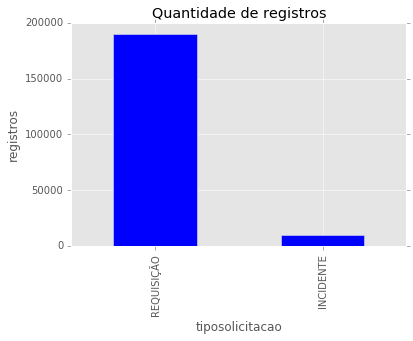

In [11]:
grafico = dadosvolume.sort_values(ascending=False).plot(kind='bar',legend=None,title="Quantidade de registros")
grafico.set_xlabel("tiposolicitacao")
grafico.set_ylabel("registros")

In [12]:
dadoslogs.situacaosolicitacao.describe() 

count           199495
unique               7
top       EM ANDAMENTO
freq             77642
Name: situacaosolicitacao, dtype: object

In [13]:
dadoslogs_group = dadoslogs.groupby('situacaosolicitacao')
dadosvolume = dadoslogs_group.size().sort_values(ascending=False)
dadosvolume


situacaosolicitacao
EM ANDAMENTO    77642
REGISTRADA      44304
RESOLVIDA       43887
FECHADA         29870
SUSPENSA         2643
REABERTA          771
CANCELADA         378
dtype: int64

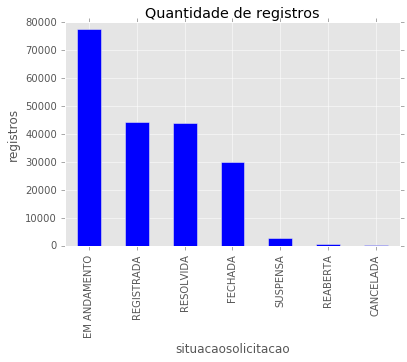

In [14]:
grafico = dadosvolume.sort_values(ascending=False).plot(kind='bar',legend=None,title="Quantidade de registros")
grafico.set_xlabel("situacaosolicitacao")
grafico.set_ylabel("registros")

In [15]:
dadoslogs.atividade.describe() 

count             199495
unique                 8
top       FILA DE ESPERA
freq               72534
Name: atividade, dtype: object

In [16]:
dadoslogs_group = dadoslogs.groupby('atividade')
dadosvolume = dadoslogs_group.size().sort_values(ascending=False)
dadosvolume

atividade
FILA DE ESPERA     72534
ATENDIMENTO        60824
FECHAMENTO         29870
ABERTURA           14768
ENCERRAMENTO       14629
RECLASSIFICAÇÃO     6577
REABERTURA           167
CANCELAMENTO         126
dtype: int64

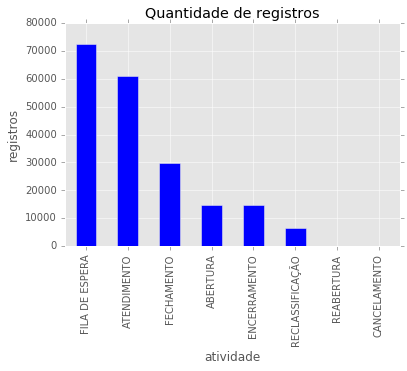

In [17]:
grafico = dadosvolume.sort_values(ascending=False).plot(kind='bar',legend=None,title="Quantidade de registros")
grafico.set_xlabel("atividade")
grafico.set_ylabel("registros")

In [18]:
dadoslogs.transicaoatividade.describe() 

count       199495
unique           4
top       complete
freq        115272
Name: transicaoatividade, dtype: object

In [19]:
dadoslogs_group = dadoslogs.groupby('transicaoatividade')
dadosvolume = dadoslogs_group.size().sort_values(ascending=False)
dadosvolume

transicaoatividade
complete    115272
start        79005
suspend       2627
resume        2591
dtype: int64

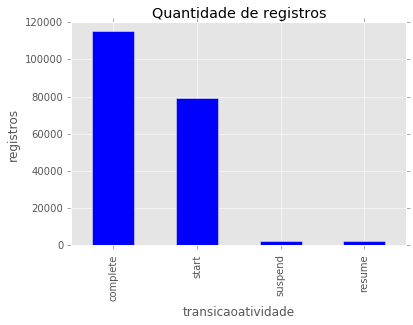

In [20]:
grafico = dadosvolume.sort_values(ascending=False).plot(kind='bar',legend=None,title="Quantidade de registros")
grafico.set_xlabel("transicaoatividade")
grafico.set_ylabel("registros")

In [21]:
dadoslogs.areaexecucaoatividade.describe() 

count         199495
unique            16
top       CIT-NIVEL1
freq           97094
Name: areaexecucaoatividade, dtype: object

In [22]:
dadoslogs_group = dadoslogs.groupby('areaexecucaoatividade')
dadosvolume = dadoslogs_group.size().sort_values(ascending=False)
dadosvolume

areaexecucaoatividade
CIT-NIVEL1        97094
CIT-PRES-DF       28441
DTI-SUPORTE       27339
CIT-SISTEMAS      18498
CIT-INFRA          7381
PORTAL             5495
DTI-INFRA          4610
HPRINT             4307
SISTEMA-SEI        1349
DTI-SEGURANÇA      1296
DTI-ELETR/REDE     1252
SERPRO             1159
OUTROS              604
RCS-TECNOLOGIA      523
DTI-CGSIS           115
CIT-VIDEOCONF        32
dtype: int64

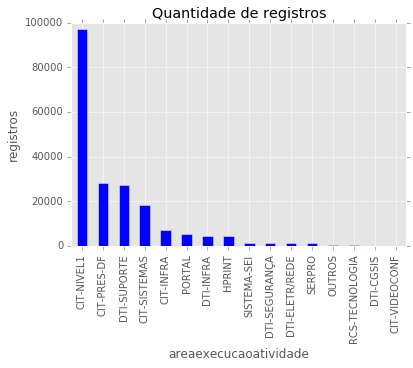

In [23]:
grafico = dadosvolume.sort_values(ascending=False).plot(kind='bar',legend=None,title="Quantidade de registros")
grafico.set_xlabel("areaexecucaoatividade")
grafico.set_ylabel("registros")

In [24]:
dadoslogs.gruposervico.describe() 

count      199495
unique         13
top       SUPORTE
freq        78524
Name: gruposervico, dtype: object

In [25]:
dadoslogs_group = dadoslogs.groupby('gruposervico')
dadosvolume = dadoslogs_group.size().sort_values(ascending=False)
dadosvolume

gruposervico
SUPORTE                     78524
APLICAÇÕES                  44966
E-MAIL                      22515
REDES                       22025
ARMAZENAMENTO DE DADOS      13217
SERVIDORES                   7128
SEGURANÇA                    3927
ENGENHARIA                   3475
INFRAESTRUTURA               1241
VIDEO CONFERENCIA            1141
GERÊNCIA DE CONFIGURAÇÃO      890
A.CLASSIFICAR                 274
AMBIENTE COLABORATIVO         172
dtype: int64

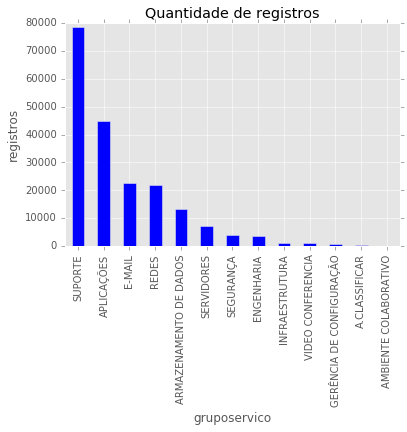

In [26]:
grafico = dadosvolume.sort_values(ascending=False).plot(kind='bar',legend=None,title="Quantidade de registros")
grafico.set_xlabel("gruposervico")
grafico.set_ylabel("registros")

In [27]:
dadoslogs.servico.describe() 

count                                      199221
unique                                         97
top       SEI (SISTEMA ELETRÔNICO DE INFORMAÇÕES)
freq                                        33915
Name: servico, dtype: object

In [28]:
dadoslogs_group = dadoslogs.groupby('servico')
dadosvolume = dadoslogs_group.size().sort_values(ascending=False)
dadosvolume

servico
SEI (SISTEMA ELETRÔNICO DE INFORMAÇÕES)          33915
ESTAÇÃO DE TRABALHO                              28947
EXPRESSO V3                                      22515
SOFTWARE                                         15102
IMPRESSORA AMC                                   14498
SERVIDOR DE ARQUIVOS (PDCMP)                     12704
CONTROLE DE ACESSO                               11435
OUTROS                                            6825
IMPRESSORA                                        6583
DHCP                                              6364
SERVIDOR FÍSICO                                   5493
SCANNER                                           5206
PONTO DA SOF                                      2679
PONTOS DE REDE LÓGICA CABEADA                     2581
TOKEN (CERTIFICADO DIGITAL)                       1453
PONTO DE REDE                                     1409
INTERNET                                          1396
CITSMART                                          1297
MO

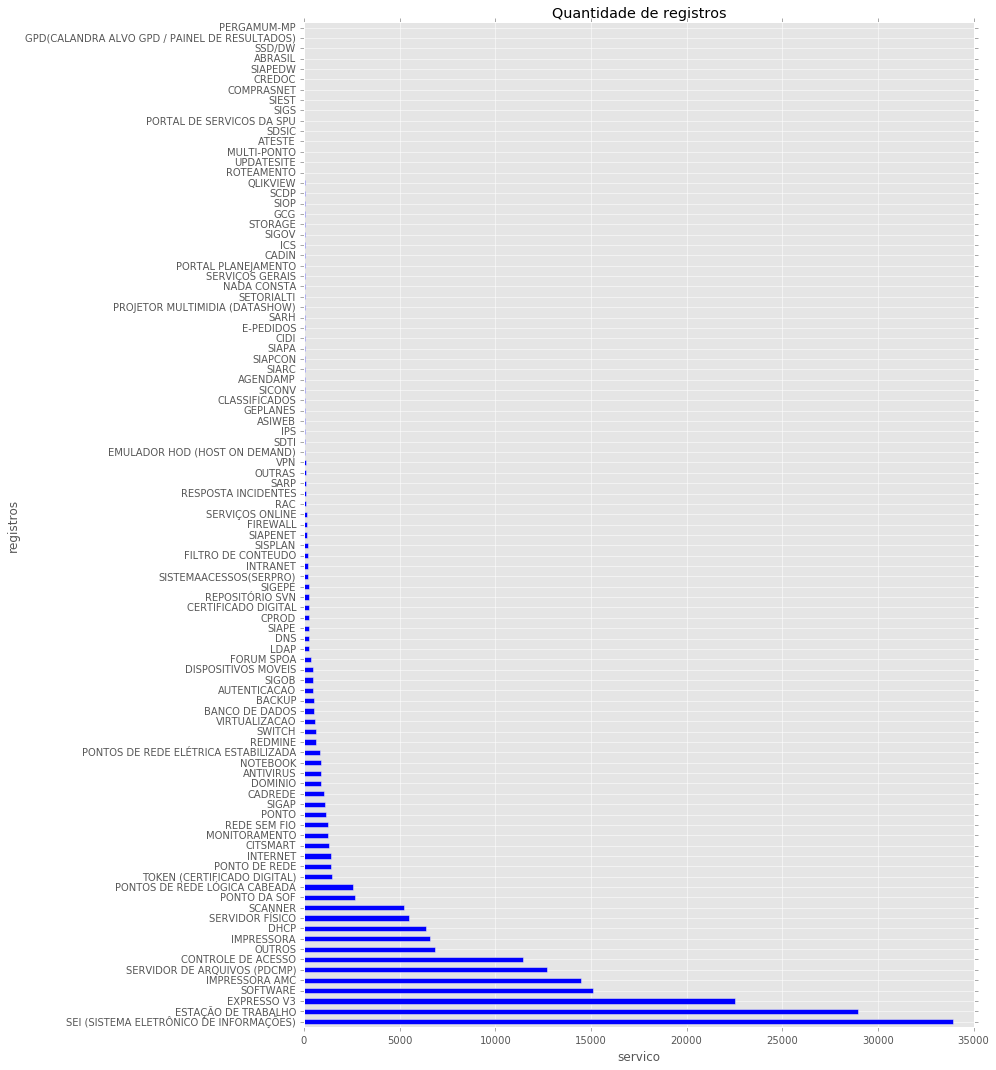

In [29]:
grafico = dadosvolume.sort_values(ascending=False).plot(kind='barh',legend=None,title="Quantidade de registros", figsize=(12, 18))
grafico.set_xlabel("servico")
grafico.set_ylabel("registros")